# Previsão de aluguel de casa

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [25]:
dados = pd.read_csv('House_Rent_Dataset.csv')
dados

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Glossário do conjunto de dados (colunas)
BHK : Número de quartos, hall, cozinha.

Rent : Aluguel das Casas/Apartamentos/Apartamentos.

Size : Tamanho das casas/apartamentos/apartamentos em pés quadrados.

Floor : Casas/Apartamentos/Apartamentos situados em que Andar e Número Total de Andares (Exemplo: Térreo de 2, 3 de 5, etc.)

Area Type : Tamanho das casas/apartamentos/apartamentos calculados na superárea ou área de carpete ou área de construção.

Area Locality : Localidade das Casas/Apartamentos/Apartamentos.

City : Cidade onde estão localizadas as casas/apartamentos/apartamentos.

Furnishing Status: Situação de Mobília das Casas/Apartamentos/Apartamentos, seja Mobiliado, Semi-Mobiliado ou Sem Mobília.

Tenant Preferred : Tipo de Inquilino Preferido pelo Proprietário ou Agente.

Bathroom : Número de Banheiros.

Point of Contact : Quem você deve contatar para obter mais informações sobre as Casas/Apartamentos/Apartamentos.

In [26]:
# VISUALIZANDO A VARIÁVEL TARGET
fig = px.box(dados, x="Rent", title='Boxplot de preços')
fig.show()

# excluindo outliers

In [27]:
print(np.where(dados['Rent']>2000000))

(array([1837], dtype=int64),)


In [28]:
dados.drop([1837], axis=0, inplace=True)

fig = px.box(dados, x="Rent",title='Boxplot for Rent Prices')
fig.show()

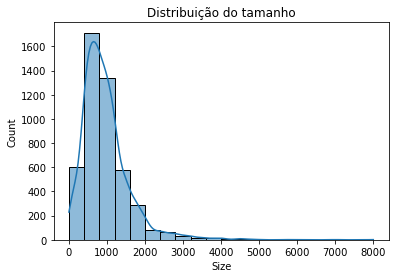

In [29]:
sns.histplot(data=dados[['Size']],x='Size',bins=20, kde='True')
plt.title("Distribuição do tamanho")
plt.xlabel("Size")
plt.show()

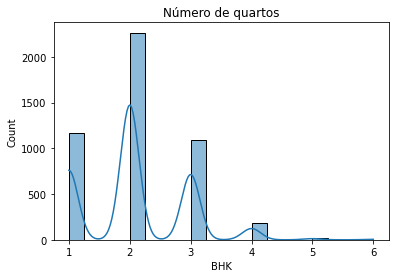

In [30]:
sns.histplot(data=dados[['BHK']],x='BHK',bins=20, kde='True')
plt.title("Número de quartos")
plt.xlabel("BHK")
plt.show()

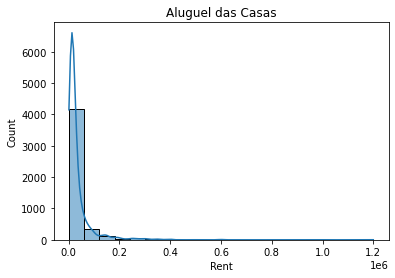

In [31]:
sns.histplot(data=dados[['Rent']],x='Rent',bins=20, kde='True')
plt.title("Aluguel das Casas")
plt.xlabel("Rent")
plt.show()

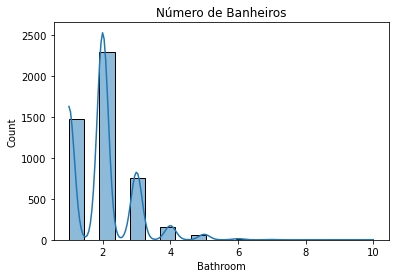

In [32]:
sns.histplot(data=dados[['Bathroom']],x='Bathroom',bins=20, kde='True')
plt.title("Número de Banheiros")
plt.xlabel("Bathroom")
plt.show()

Obs.: Casas com dois quartos, um ou dois banheiros e maiores são mais alugadas.E os valores são bem altos.

In [33]:
dados.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [34]:
dados.describe()

,BHK,Rent,Size,Bathroom
count,4745.000000,4.745000e+03,4745.000000,4745.000000
mean,2.083667,3.426321e+04,967.167756,1.965648
std,0.832237,5.975393e+04,633.878701,0.884497
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,1.200000e+06,8000.000000,10.000000


In [35]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4745 non-null   object
 1   BHK                4745 non-null   int64 
 2   Rent               4745 non-null   int64 
 3   Size               4745 non-null   int64 
 4   Floor              4745 non-null   object
 5   Area Type          4745 non-null   object
 6   Area Locality      4745 non-null   object
 7   City               4745 non-null   object
 8   Furnishing Status  4745 non-null   object
 9   Tenant Preferred   4745 non-null   object
 10  Bathroom           4745 non-null   int64 
 11  Point of Contact   4745 non-null   object
dtypes: int64(4), object(8)
memory usage: 611.0+ KB


## Removendo colunas desnecessárias do conjunto de dados

In [36]:
dados.drop(['Posted On','Area Locality','Floor'], axis=1, inplace=True)

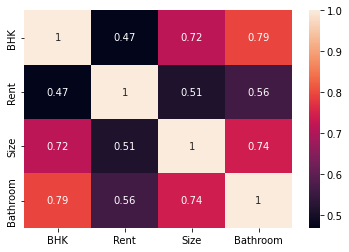

In [37]:
#figura = plt.figure(figsize=(20,20))
sns.heatmap(dados.corr(), annot=True);

## Separando x e y

In [38]:
x_casa = dados.drop('Rent', axis=1)
y_casa = dados['Rent']

In [39]:
x_casa.shape, y_casa.shape

((4745, 8), (4745,))

In [40]:
x_casa.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Converte dados categóricos

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# criando uma variavel para cada variavel string
label_encoder_AreaType = LabelEncoder()
label_encoder_City = LabelEncoder()
label_encoder_FurnishingStatus = LabelEncoder()
label_encoder_TenantPreferred = LabelEncoder()
label_encoder_PointofContact = LabelEncoder()

In [43]:
# acessando cada variável para transforma-la
x_casa.iloc[:,2] = label_encoder_AreaType.fit_transform(x_casa.iloc[:,2])
x_casa.iloc[:,3] = label_encoder_City.fit_transform(x_casa.iloc[:,3])
x_casa.iloc[:,4] = label_encoder_FurnishingStatus.fit_transform(x_casa.iloc[:,4])
x_casa.iloc[:,5] = label_encoder_TenantPreferred.fit_transform(x_casa.iloc[:,5])
x_casa.iloc[:,7] = label_encoder_PointofContact.fit_transform(x_casa.iloc[:,7])

In [44]:
x_casa

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,2,4,2,1,2,2
1,2,800,2,4,1,1,1,2
2,2,1000,2,4,1,1,1,2
3,2,800,2,4,2,1,1,2
4,2,850,1,4,2,0,1,2
...,...,...,...,...,...,...,...,...
4741,2,1000,1,3,1,1,2,2
4742,3,2000,2,3,1,1,3,2
4743,3,1750,1,3,1,1,3,0
4744,3,1500,1,3,1,2,2,0


## Previsão

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x_casa, y_casa, test_size = 0.3, random_state = 0)

In [47]:
X_treinamento.shape, y_treinamento.shape

((3321, 8), (3321,))

In [48]:
X_teste.shape, y_teste.shape

((1424, 8), (1424,))

## Escalonamento dos valores

In [70]:
from sklearn.preprocessing import StandardScaler
scaler_x_casas = StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_treinamento)
scaler_y_casas = StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_treinamento.values.reshape(-1,1))

In [71]:
X_casas_treinamento_scaled, y_casas_treinamento_scaled

(array([[-0.08712573,  0.30543696,  0.96304894, ...,  0.13423007,
          0.05432558,  0.67984591],
        [-0.08712573, -0.13515139, -1.03338398, ...,  0.13423007,
          0.05432558, -1.471434  ],
        [ 1.12860766,  0.22532999, -1.03338398, ...,  2.07239553,
          0.05432558,  0.67984591],
        ...,
        [-0.08712573,  0.22532999,  0.96304894, ...,  0.13423007,
          0.05432558,  0.67984591],
        [ 1.12860766,  1.3468276 ,  0.96304894, ...,  2.07239553,
          1.18901274, -1.471434  ],
        [-1.30285911, -0.81606066,  0.96304894, ...,  0.13423007,
         -1.08036158,  0.67984591]]),
 array([[ 0.11869262],
        [ 1.36196931],
        [-0.2010071 ],
        ...,
        [-0.2010071 ],
        [-0.07667943],
        [-0.41414025]]))

In [72]:
X_casas_treinamento_scaled.shape, y_casas_treinamento_scaled.shape

((3321, 8), (3321, 1))

In [73]:
X_casas_teste_scaled = scaler_x_casas.fit_transform(X_teste)
scaler_y_casas = StandardScaler()
y_casas_teste_scaled = scaler_y_casas.fit_transform(y_teste.values.reshape(-1,1))

In [74]:
X_casas_teste_scaled.shape, y_casas_teste_scaled.shape

((1424, 8), (1424, 1))

## Usando Rede Neural

In [96]:
from sklearn.neural_network import MLPRegressor
regressor_rna_casa = MLPRegressor(max_iter=1000, hidden_layer_sizes=(10,10))
regressor_rna_casa.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

In [97]:
regressor_rna_casa.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.7576577113416698

In [98]:
regressor_rna_casa.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.7757180360385806

In [78]:
previsoes = regressor_rna_casa.predict(X_casas_teste_scaled).reshape(-1, 1)
previsoes

array([[-0.08917987],
       [-0.1163608 ],
       [-0.22923939],
       ...,
       [-0.3743423 ],
       [-0.06859437],
       [-0.44416246]])

In [79]:
y_casas_teste_scaled

array([[-0.24564196],
       [ 0.35096412],
       [ 0.42553988],
       ...,
       [-0.06666014],
       [ 0.42553988],
       [-0.43953894]])

In [80]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes)

In [81]:
y_casas_teste_inverse

array([[20000.],
       [60000.],
       [65000.],
       ...,
       [32000.],
       [65000.],
       [ 7000.]])

In [82]:
previsoes_inverse

array([[30490.14432817],
       [28667.77383092],
       [21099.72554644],
       ...,
       [11371.1685591 ],
       [31870.31798468],
       [ 6690.01186791]])

In [83]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

14228.220075147572